In [73]:
import urllib.request
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

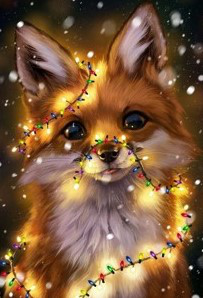

In [74]:
# url = 'https://github.com/Harshvg101/Harshvg101/blob/main/Lion.jpg'
# image = Image.open('/miximage.jgp')
image = Image.open('/content/fox.jpg')
image.show()

In [75]:
img = np.array(image)
rows = img.shape[0]
cols = img.shape[1]
img = img.reshape(rows * cols, 3)
rows, cols, img.shape

(298, 203, (60494, 3))

In [76]:
def euc_distance(p1, p2):
 return np.sqrt(np.sum(np.square(p1 - p2)))

In [77]:
def plot_image(MU, Z):
  for i in range(rows * cols):
    img_arr = np.array(MU[np.argmax(Z[i])])
  img = img_arr.reshape(rows, cols, 3)
  return Image.fromarray(np.uint8(img))

In [78]:
def E_Step(n, data, MU, clusters, Z):
    """
        Perform the expectation step of the K-means algorithm.
          
          Args:
          - n (int): number of data points
          - data (ndarray): n x d array of data points
          - MU (ndarray): k x d array of cluster centers
          - clusters (int): number of clusters
          - Z (ndarray): n x k array of binary indicator variables for each data point
          
          Returns:
          - Z (ndarray): updated n x k array of binary indicator variables
    """
    for p in range(n):
        point = data[p]
        distance_from_centers = []
        for i in range(clusters):
            distance_from_centers.append(euc_distance(point, MU[i]))
        chosen_cluster = np.argmin(distance_from_centers)
        Z[p] = np.zeros(clusters)
        Z[p, chosen_cluster] = 1
    return Z

In [79]:
def M_Step(n, MU, Z, data, clusters):
  """
        This function updates the centroids based on the assigned clusters.
        n: number of data points
        MU: current centroids
        Z: assigned clusters
        data: data points
        clusters: number of clusters
  """

  # create an empty array to store the new centroids
  MUk = np.zeros((clusters, data.shape[1]))

  # loop over the clusters
  for j in range(clusters):
    numerator = np.zeros(data.shape[1])
    denominator = np.sum(Z[:, j])
    for i in range(n):
        numerator += Z[i, j] * data[i]
    MUk[j] = numerator / denominator
  return MUk


In [82]:
def K_Means_Image_Segmentation(data, clusters):
  n = data.shape[0]
  max_iters = 5
  epsilon = 1e-3
  random_indices = np.random.choice(n, clusters, replace=False)
  MU = np.array([data[i] for i in random_indices])
  MU_prev = np.array([np.zeros(data[i].shape) for i in range(clusters)])
  Z = np.zeros((n, clusters))
  iters = 0

  while iters < max_iters:
    Z = E_Step(n,data,MU, clusters, Z)
    # Update MU_prev to keep track of the previous centers
    MU_prev = MU
    # Perform the M-Step to update the centers
    MU = M_Step(n, MU, Z, data, clusters)

    iters += 1

    if np.sum(np.absolute(MU - MU_prev)) < epsilon:
      print("K-Means Algorithm has converged!")
      break
 
  return MU, Z

K = 2


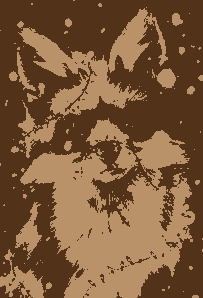

K = 3


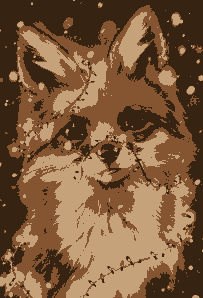

K = 10


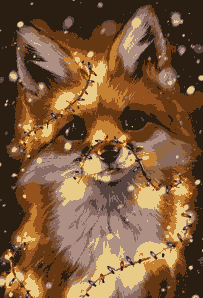

In [83]:
clusters = [2, 3, 10]
for c in clusters:
  centers, labels = K_Means_Image_Segmentation(img, c)
  print("K =", c)
  display(plot_image(centers, labels))